In [1]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/titanic.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #### data visualization
import seaborn as sns   #### data visualization

In [3]:
titanic_data = pd.read_csv(path)

In [4]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_data[['PassengerId','Name','Age']].head()

,PassengerId,Name,Age
0,1,"Braund, Mr. Owen Harris",22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,3,"Heikkinen, Miss. Laina",26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,5,"Allen, Mr. William Henry",35.0


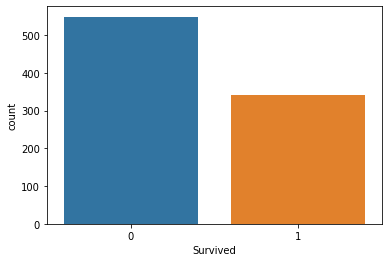

In [7]:
#### Analyse the Data
sns.countplot(titanic_data['Survived'])
plt.show()

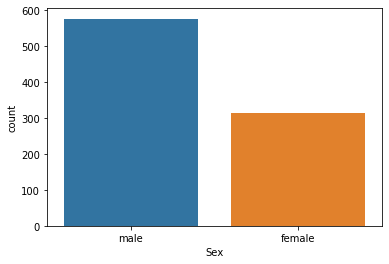

In [8]:
#### Analyse the Data
sns.countplot(titanic_data['Sex'])
plt.show()

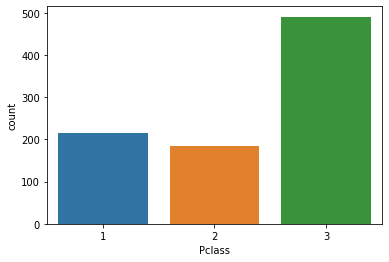

In [9]:
#### Analyse the Data
sns.countplot(titanic_data['Pclass'])
plt.show()

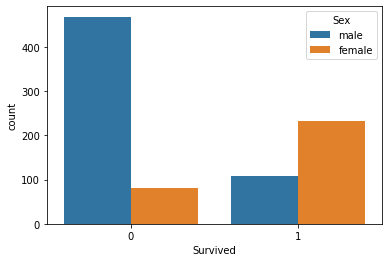

In [10]:
#### Analyse the Data
sns.countplot(titanic_data['Survived'],hue=titanic_data['Sex'])
plt.show()

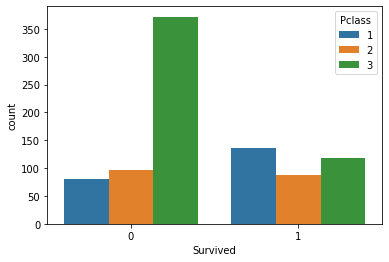

In [11]:
#### Analyse the Data
plt.xlabel("Fare")
plt.ylabel("No.of passengers")
sns.countplot(titanic_data['Survived'],hue=titanic_data['Pclass'])
plt.show()

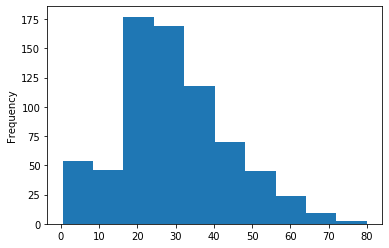

In [12]:
titanic_data['Age'].plot.hist()

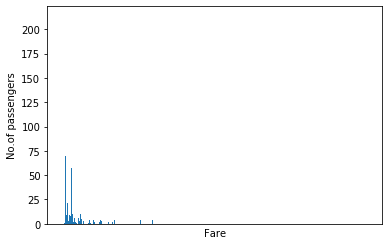

In [13]:
plt.xlabel("Fare")
plt.ylabel("No.of passengers")
plt.xticks([])
plt.hist(titanic_data['Fare'],titanic_data.index)
plt.show()

####  Data Wrangling (Drop Unecessary Columns / Null Values)

In [14]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_data.drop(["PassengerId",'Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [16]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [17]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [18]:
mean_age = titanic_data['Age'].mean()
mean_age = np.round(mean_age,2)
mean_age

29.7

In [19]:
titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)

In [20]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [21]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [22]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
pclass = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [25]:
titanic_data = pd.concat([titanic_data,sex,pclass],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,2,3
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,1


In [26]:
titanic_data.drop(['Pclass','Sex'],axis=1,inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [27]:
titanic_data = titanic_data.rename(columns={"male":"sex",2:"pclass_2",3:"pclass_3"})
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,sex,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
sex         891 non-null uint8
pclass_2    891 non-null uint8
pclass_3    891 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [30]:
titanic_data.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'